In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


In [14]:
s27 = pd.read_parquet("20190927.parquet")

In [15]:
s27.shape

(73660, 60)

In [16]:
s27.head()

,0_3um,0_5um,1_0um,2_5um,5_0um,10_0um,pm1_0,pm10_0,created,pm1_0_atm,pm2_5_atm,pm10_0_atm,uptime,rssi,temperature,humidity,pm2_5_cf_1,a_h,device_loc_typ,high_reading_flag,hidden,sensor_id,sensor_name,lat,lon,parent_id,is_owner,city,county,zipcode,created_at,year,month,day,hour,minute,wban_number,call_sign,call_sign2,interval,call_sign3,zulu_time,report_modifier,wind_data,wind_direction,wind_speed,gusts,gust_speed,variable_winds,variable_wind_info,sys_maint_reqd,epa_pm25_unit,epa_pm25_value,raw_concentration,aqi,category,site_name,agency_name,full_aqs_code,intl_aqs_code
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,935.56,270.69,45.63,7.76,2.35,0.00,4.57,8.82,201909270000,4.34,7.07,9.19,913.0,-74.0,83.0,46.0,7.07,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:00,2019,09,27,00,00,23234,KSFO,SFO,5-MIN,KSFO,270800Z,,1.0,250,6.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
1,842.38,244.69,51.99,9.53,3.35,0.00,3.78,8.69,201909270010,4.24,6.82,9.66,923.0,-71.0,82.0,47.0,6.82,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:10,2019,09,27,00,10,23234,KSFO,SFO,5-MIN,KSFO,270810Z,,1.0,240,8.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
2,832.65,247.20,41.00,6.56,2.14,1.10,3.93,8.15,201909270020,4.07,7.60,9.65,932.0,-72.0,81.0,47.0,7.60,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:20,2019,09,27,00,20,23234,KSFO,SFO,5-MIN,KSFO,270820Z,,1.0,250,6.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
3,916.69,260.89,48.72,7.73,2.65,0.00,3.97,8.58,201909270030,3.97,6.94,8.58,942.0,-75.0,81.0,48.0,6.94,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:30,2019,09,27,00,30,23234,KSFO,SFO,5-MIN,KSFO,270830Z,,1.0,250,7.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005
4,924.00,269.25,51.26,6.03,3.65,1.59,4.68,9.53,201909270040,4.68,6.85,9.53,952.0,-73.0,80.0,49.0,6.85,None,outside,nan,false,16939,#SAFQ11,37.72244,-122.439302,nan,0,San Francisco,San Francisco County,94112,2019/09/27T00:40,2019,09,27,00,40,23234,KSFO,SFO,5-MIN,KSFO,270840Z,,1.0,250,7.0,0.0,NaN,0.0,,0.0,UG/M3,5.8,4.0,24,1,San Francisco,San Francisco Bay Area AQMD,60750005,840060750005


In [17]:
s27.dtypes

0_3um                 float64
0_5um                 float64
1_0um                 float64
2_5um                 float64
5_0um                 float64
10_0um                float64
pm1_0                 float64
pm10_0                float64
created                 int64
pm1_0_atm             float64
pm2_5_atm             float64
pm10_0_atm            float64
uptime                float64
rssi                  float64
temperature           float64
humidity              float64
pm2_5_cf_1            float64
a_h                    object
device_loc_typ         object
high_reading_flag      object
hidden                 object
sensor_id              object
sensor_name            object
lat                   float64
lon                   float64
parent_id              object
is_owner               object
city                   object
county                 object
zipcode                object
created_at             object
year                   object
month                  object
day       

In [17]:
s27.groupby(['device_loc_typ']).agg({'sensor_id':'count'})

,sensor_id
device_loc_typ,
inside,34150
outside,50016


In [19]:
s27[s27.device_loc_typ == "outside"]['high_reading_flag'].describe()

count     50016
unique        2
top         nan
freq      38128
Name: high_reading_flag, dtype: object

In [18]:
## hm
out_df = s27[s27.device_loc_typ == "outside"]

num_cols = ['0_3um', '0_5um', '1_0um', '2_5um', '5_0um', '10_0um', 'pm1_0',
            'pm10_0', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm', 'pm2_5_cf_1', 'humidity',
            'epa_pm25_value']
out_df.groupby(['high_reading_flag']).agg({c:'mean' for c in num_cols})

,0_3um,0_5um,1_0um,2_5um,5_0um,10_0um,pm1_0,pm10_0,pm1_0_atm,pm2_5_atm,pm10_0_atm,pm2_5_cf_1,humidity,epa_pm25_value
high_reading_flag,,,,,,,,,,,,,,
1.0,3351.241272,854.945982,41.516759,3.206442,1.063179,0.366265,345.061544,347.857859,515.638516,517.322132,518.262426,346.678954,60.286079,5.178449
nan,733.721276,211.624425,33.352578,4.032691,1.340495,0.500333,3.232498,6.116706,3.214228,5.082761,6.157138,5.100338,62.324511,5.144524


In [5]:
(out_df.high_reading_flag == "1.0").mean()

0.23768394113883556

**so, 23 percent of all values have 'high reading flag'**

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(out_df[num_cols].fillna(out_df[num_cols].mean()))


Text(0.5, 1.0, 'PCA of numeric columns')

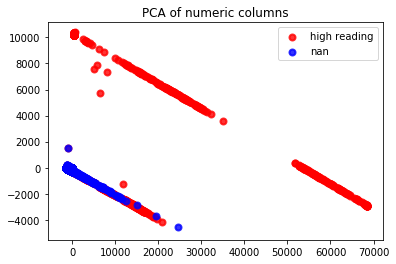

In [20]:
lw = 2

plt.scatter(X[out_df.high_reading_flag == "1.0", 0], X[out_df.high_reading_flag == "1.0", 1], 
            color="red", alpha=.8, lw=lw,label="high reading")

plt.scatter(X[out_df.high_reading_flag != "1.0", 0], X[out_df.high_reading_flag != "1.0", 1], 
           color="blue", alpha=.8, lw=lw,label="nan")

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of numeric columns')

## actually moving on to anomaly detection methods -- picking a couple variables for univariate testing

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


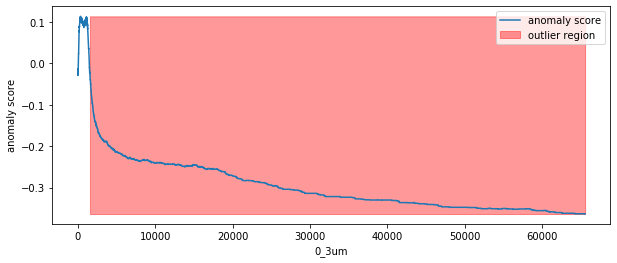

In [23]:
from sklearn.ensemble import IsolationForest

df_1 = out_df[out_df['0_3um'].notna()]

isolation_forest = IsolationForest(n_estimators=100, contamination = 0.05)
isolation_forest.fit(df_1['0_3um'].values.reshape(-1, 1))

xx = np.linspace(df_1['0_3um'].min(), df_1['0_3um'].max(), len(df_1)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)

outlier = isolation_forest.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('0_3um')
plt.show();

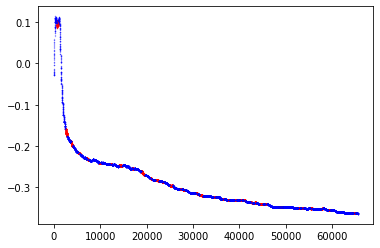

In [24]:
# plot scatter y anomaly score, x reading, vertical line for outlier region, 
#color dots for 'high reading'


plt.scatter(xx[df_1.high_reading_flag == "1.0"], anomaly_score[df_1.high_reading_flag == "1.0"],
            color = "red", s = 0.2)
plt.scatter(xx[df_1.high_reading_flag != "1.0"], anomaly_score[df_1.high_reading_flag != "1.0"],
            color = "blue", s = 0.1, alpha = 0.5)

doesn't seem like outlier score (for this particular metric) is tied to 'high reading'?

## multivariate?

In [28]:
from sklearn import preprocessing

df_2 = out_df[out_df['0_3um'].notna()][['0_3um', 'epa_pm25_value']]

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(df_2)

In [42]:
outliers_fraction = 0.1

xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))

clf  = IsolationForest(n_estimators=100, contamination = 0.1)
clf .fit(X)

scores_pred = isolation_forest.decision_function(X) * -1

/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


/home/ubuntu/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


OUTLIERS:  2440 INLIERS:  22127


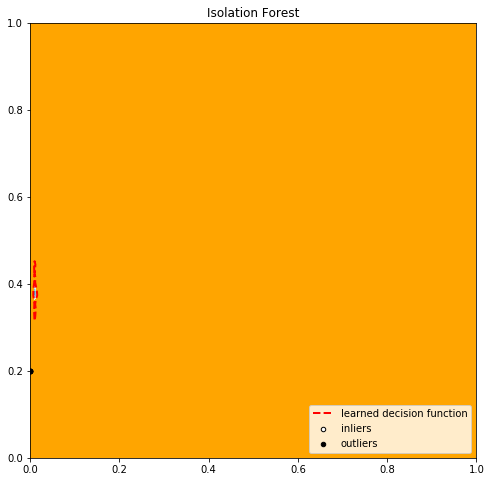

In [47]:

y_pred = clf.predict(X)
n_inliers = np.sum(y_pred == 1)
n_outliers = np.sum(y_pred == -1)
plt.figure(figsize=(8, 8))

df_2['outliers'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_03 = np.array(df_2['0_3um'][df_2['outliers'] == 1]).reshape(-1,1)
inliers_epa = np.array(df_2['epa_pm25_value'][df_2['outliers'] == 1]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_03 = df_2['0_3um'][df_2['outliers'] == -1].values.reshape(-1,1)
outliers_epa = df_2['epa_pm25_value'][df_2['outliers'] == -1].values.reshape(-1,1)
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = np.percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_03, inliers_epa, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_03, outliers_epa, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show();

In [44]:
y_pred.tolist()

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,